In [1]:
import warnings
warnings.filterwarnings('ignore')

import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
#맷플랏립 그래프 주피터에서 바로 출력하기
import seaborn as sns

from scipy import stats
from scipy.stats import t, norm, chi2, chi2_contingency
import re
import time

from matplotlib import rc
rc('font', family='Malgun Gothic')      #한글 폰트설정
plt.rcParams['axes.unicode_minus']=False      #마이너스 부호 출력 설정

In [2]:
from sklearn.datasets import load_iris
from sklearn import datasets

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Binarizer

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score

In [3]:
from sklearn import tree
from sklearn.datasets import make_classification

from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

import xgboost    #1.7.5버전
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer

from hyperopt import hp
from hyperopt import fmin, tpe, Trials
from hyperopt import STATUS_OK

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_boston

### Polynomial Regression

In [4]:
# Polynomial 클래스로 다항식 변환
from sklearn.preprocessing import PolynomialFeatures

x = np.arange(4).reshape(2,2)
print(f'일차 단항식 계수: \n{x}\n')

poly = PolynomialFeatures(degree=2)
poly.fit(x)
poly_ftr = poly.transform(x)
print(f'변환된 2차 다항식 계수: \n{poly_ftr}')

일차 단항식 계수: 
[[0 1]
 [2 3]]

변환된 2차 다항식 계수: 
[[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [5]:
# 3차 다항식 결정값을 구하는 함수 Polynomial_func(x) 생성
# 즉, 회귀식은 결정값 y=1 + 2x_1 + 3x_1^2 + 4x_2^3

def polynomial_func(x):
    y = 1 + 2*x[:,0] + 3*x[:,0]**2 + 4*x[:,1]**3
#     print(x[:,0])     # x변수 확인용
#     print(x[:,1],'\n')
    return y

print(f'일차 단항식 계수: \n{x}\n')
y = polynomial_func(x)
print(f'삼차 다항식 결정값: \n{y}')

일차 단항식 계수: 
[[0 1]
 [2 3]]

삼차 다항식 결정값: 
[  5 125]


In [6]:
# 입력 데이터 x를 3차 다항식으로 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(x)
# degree=2: 다항식의 최고 차수를 3로 설정하겠다
print(f'3차 다항식 계수 feature: \n{poly_ftr}\n')

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 
# 학습 후 회귀계수 확인
model = LinearRegression()   #선형 회귀 모델을 생성
model.fit(poly_ftr, y)   #학습 (다항식 회귀 계수 추정)

print(f'Polynomial 회귀 계수: \n{np.round(model.coef_, 2)}\n')   #추정된 다항식 회귀 계수를 출력
# model.coef_: 학습된 모델의 계수(각 계수: 해당 다항식 계수 feature의 가중치)
print(f'Polynomial 회귀 shape: {model.coef_.shape}')   # 다항식 계수 feature 수와 일치

3차 다항식 계수 feature: 
[[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]

Polynomial 회귀 계수: 
[0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]

Polynomial 회귀 shape: (10,)


#### 사이킷런 파이프라인(Pipeline)을 이용하여 3차 다항회귀 학습
- 사이킷런의 Pipeline 객체는 feature 엔지니어링 변환과 모델 학습/예측을 순차적으로 결합해줍니다.

In [7]:
from sklearn.pipeline import Pipeline

def polynomial_func(x):   #3차 다항식 결정값을 구하는 함수
    y = 1 + 2*x[:,0] + 3*x[:,0]**2 + 4*x[:,1]**3
    return y

model = Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear',LinearRegression())])
# 데이터변환(poly) + 모델학습(linear) 단계를 연결해, 한번에 실행하는 파이프라인 객체 생성

x=np.arange(4).reshape(2,2)   #입력데이터 x
y=polynomial_func(x)   #결정값 y

model = model.fit(x,y)   #학습

a = model.named_steps['linear'].coef_   #다항식 회귀계수
# coef_: 선형 회귀 모델의 계수
# named_steps['linear']: 파이프라인에서 linear단계(LinearRegression 객체)를 참조
print('Polymial 회귀계수: \n', np.round(a, 2))

Polymial 회귀계수: 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### Regularized Linear Model 

1. Lasso (Least Absolute Shrinkage and Selection Operator) Regression:

Lasso 회귀는 선형 회귀의 한 형태로, 특징 선택과 정규화를 함께 수행하여 최종 모델의 예측 성능을 향상시킵니다. Lasso는 목적 함수에 L1 패널티를 추가하여 일부 특징의 계수를 완전히 0으로 만듭니다. 이렇게 하면 덜 중요한 특징이 모델에서 제외되므로 특징 선택이 이루어집니다. 이 점은 고차원 데이터에서 유용합니다.

2. Ridge Regression:

Ridge 회귀도 선형 회귀의 한 형태로, L2 정규화를 사용합니다. L2 패널티는 모든 계수의 제곱을 합한 값을 목적 함수에 더하는 것을 의미합니다. 이로 인해 계수가 0이 되지는 않지만, 모델의 복잡성을 줄이고 다중공선성 문제를 완화하여 모델의 일반화 성능을 향상시킵니다.

3. Elastic Net Regression:

Elastic Net 회귀는 Lasso와 Ridge 회귀의 조합입니다. L1과 L2 패널티를 모두 사용하여 특징 선택의 이점과 복잡성 제어를 동시에 수행합니다. Elastic Net은 Lasso와 Ridge의 특징을 모두 가지므로, 적은 수의 특징이 관련성이 높을 때(Lasso)와 많은 수의 특징이 관련성이 높을 때(Ridge) 모두 좋은 성능을 보입니다.

이 세 가지 회귀 방법 모두 머신러닝 모델이 훈련 데이터에 과적합되는 것을 방지하는 데 도움이 됩니다. 이는 모델이 새로운, 이전에 보지 못한 데이터에 대해 더 잘 일반화하도록 돕습니다. 
#### 이들 방법은 사이킷런의 linear_model 모듈에 Lasso, Ridge, ElasticNet 클래스로 구현되어 있습니다.

### 릿지 회귀

In [11]:
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['PRICE'] = boston.target

xdf = df.drop('PRICE', axis=1)
ydf = df['PRICE']

ridge = Ridge(alpha=10)

neg_mse_scores = cross_val_score(ridge, xdf, ydf, scoring='neg_mean_squared_error', cv=5)
# MSE: 오차의 제곱의 평균값 = 절대값이 작을수록 좋음
# 다만 cross_val_score는 값이 클수록 좋으므로 '-'를 붙여줌(절대값이 작은 것이 더 좋게 나올 수 있게)
rmse_scores = np.sqrt(-1*neg_mse_scores)
# RMSE: MSE의 제곱근(루트):  MSE값을 다시 원래 스케일로 되돌린 값
# =실제 오차 크기를 나타내는 값 = 작을수록 좋음
avg_rmse = np.mean(rmse_scores)

print(f'5개 폴드의 개별 Negative MSE scores: {np.round(neg_mse_scores,2)}')
print(f'5개 폴드의 개별 RMSE scores: {np.round(rmse_scores,2)}')
print(f'5개 폴드의 평균 RMSE: {avg_rmse:.3f}')

5개 폴드의 개별 Negative MSE scores: [-11.42 -24.29 -28.14 -74.6  -28.52]
5개 폴드의 개별 RMSE scores: [3.38 4.93 5.31 8.64 5.34]
5개 폴드의 평균 RMSE: 5.518


#### 알파값 변화주며 RMSE측정

In [15]:
for i in [0, 0.1, 1, 10, 100]:
    ridge = Ridge(alpha=i)

    neg_mse_scores = cross_val_score(ridge, xdf, ydf, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)

    print(f'alpha = {i}일 때,')
    print(f'5개 폴드의 개별 Negative MSE scores: {np.round(neg_mse_scores,2)}')
    print(f'5개 폴드의 개별 RMSE scores: {np.round(rmse_scores,2)}')
    print(f'5개 폴드의 평균 RMSE: {avg_rmse:.3f}\n')

alpha = 0일 때,
5개 폴드의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5개 폴드의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5개 폴드의 평균 RMSE: 5.829

alpha = 0.1일 때,
5개 폴드의 개별 Negative MSE scores: [-12.32 -25.2  -32.43 -80.7  -32.88]
5개 폴드의 개별 RMSE scores: [3.51 5.02 5.7  8.98 5.73]
5개 폴드의 평균 RMSE: 5.788

alpha = 1일 때,
5개 폴드의 개별 Negative MSE scores: [-11.71 -23.58 -29.69 -80.23 -31.12]
5개 폴드의 개별 RMSE scores: [3.42 4.86 5.45 8.96 5.58]
5개 폴드의 평균 RMSE: 5.653

alpha = 10일 때,
5개 폴드의 개별 Negative MSE scores: [-11.42 -24.29 -28.14 -74.6  -28.52]
5개 폴드의 개별 RMSE scores: [3.38 4.93 5.31 8.64 5.34]
5개 폴드의 평균 RMSE: 5.518

alpha = 100일 때,
5개 폴드의 개별 Negative MSE scores: [-12.82 -27.28 -34.68 -52.69 -22.05]
5개 폴드의 개별 RMSE scores: [3.58 5.22 5.89 7.26 4.7 ]
5개 폴드의 평균 RMSE: 5.330



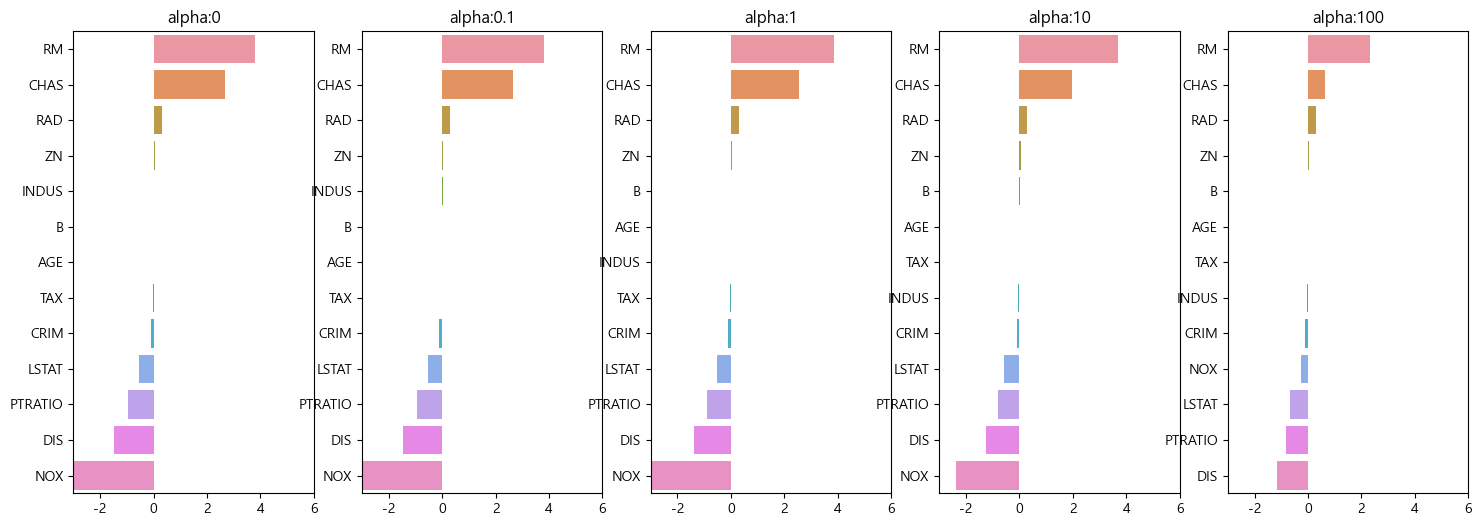

In [20]:
# 각 alpha값에 따른 회귀계수값 시각화
fig, ax = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
coeff_df = pd.DataFrame()   #회귀계수값 저장

# alpha값 변화주며 반복
for i, alp in enumerate([0, 0.1, 1, 10, 100]):
    ridge = Ridge(alpha=alp)
    ridge.fit(xdf, ydf)
    
    # 피처별로 알파에 따른 회귀계수값을 시리즈로 저장, 데이터프레임에 추가
    coeff = pd.Series(data=ridge.coef_, index=xdf.columns)
    colname = 'alpha:'+str(alp)
    coeff_df[colname] = coeff
    
    coeff = coeff.sort_values(ascending=False)   #회귀계수값 높은 순으로 정렬
    
    ax[i].set_title(colname)
    ax[i].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=ax[i])
plt.show()

In [23]:
ridge_alphas=[0, 0.1, 1, 10, 100]
sort_columns = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_columns, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


### 라쏘 회귀

In [32]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha값에 따른 회귀모델의 폴드 평균 RMSE를 출력하고
# 회귀 계수값들을 데이터프레임으로 반환
def get_linear_reg_eval(model, params, xdf, ydf, verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose: print(f'######### {model} #########')
        
    for p in params:
        if model == 'Ridge': nmodel=Ridge(alpha=p)
        elif model == 'Lasso': nmodel=Lasso(alpha=p)
        elif model == 'ElasticNet': nmodel=ElasticNet(alpha=p, l1_ratio=0.7)
        
        neg_mse_scores = cross_val_score(nmodel, xdf, ydf, scoring='neg_mean_squared_error', cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print(f'alpha = {p}일때, 5폴드 세트의 평균 RMSE: {avg_rmse}')
        # cross_val_score는 evaluation metric만 반환 -> 모델을 다시 학습해 회귀계수 추출
        
        nmodel.fit(xdf, ydf)
        if return_coeff:
            # 알파값에 따른 피처별 회귀계수를 시리즈로 반환, 데이터프레임에 추가
            coeff = pd.Series(data=nmodel.coef_, index=xdf.columns)
            colname = 'alpha:'+str(p)
            coeff_df[colname] = coeff
            
    return coeff_df

In [38]:
#### 위 사용자함수 이용해 라쏘회귀
lasso_alphas = [0.07, 0.1, 0.5, 1.3]   # 라쏘에 사용할 알파 파라미터들
coeff_lasso_df = get_linear_reg_eval('Lasso', lasso_alphas, xdf, ydf)  #함수 호출

coeff_lasso_df.head(3)

######### Lasso #########
alpha = 0.07일때, 5폴드 세트의 평균 RMSE: 5.612284267526675
alpha = 0.1일때, 5폴드 세트의 평균 RMSE: 5.615116035266936
alpha = 0.5일때, 5폴드 세트의 평균 RMSE: 5.6691234095948975
alpha = 1.3일때, 5폴드 세트의 평균 RMSE: 5.845140126349934


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1.3
CRIM,-0.098193,-0.097894,-0.083289,-0.051638
ZN,0.049059,0.049211,0.049544,0.048850
INDUS,-0.042120,-0.036619,-0.005253,-0.000000


In [39]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬해
# 회귀계수 데이터프레임 출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1.3
RM,3.789725,3.703202,2.498212,0.018113
CHAS,1.434343,0.955190,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.255433
ZN,0.049059,0.049211,0.049544,0.048850
B,0.010248,0.010249,0.009469,0.007507
NOX,-0.000000,-0.000000,-0.000000,-0.000000
AGE,-0.011706,-0.010037,0.003604,0.031350
TAX,-0.014290,-0.014570,-0.015442,-0.014981
INDUS,-0.042120,-0.036619,-0.005253,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.051638


In [ ]:
# 회귀계수와 RMSE는 다른 것인가?
# 5개 폴드 평균 RMSE란 무엇인가(피처별로 다 다르게 나오는게 아니었나?)

In [40]:
#### 위 사용자함수 이용해 엘라스틱넷 회귀
el_alphas = [0.07, 0.1, 0.5, 1.3]
coeff_el_df = get_linear_reg_eval('ElasticNet', el_alphas, xdf, ydf)

coeff_el_df.head(3)

######### ElasticNet #########
alpha = 0.07일때, 5폴드 세트의 평균 RMSE: 5.54165434734814
alpha = 0.1일때, 5폴드 세트의 평균 RMSE: 5.52592849629491
alpha = 0.5일때, 5폴드 세트의 평균 RMSE: 5.466748649445586
alpha = 1.3일때, 5폴드 세트의 평균 RMSE: 5.670070242598679


,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1.3
CRIM,-0.099468,-0.099213,-0.089070,-0.064928
ZN,0.050107,0.050617,0.052878,0.050578
INDUS,-0.044855,-0.042719,-0.023252,-0.000000


In [41]:
sort_column = 'alpha:'+str(el_alphas[0])
coeff_el_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1.3
RM,3.574162,3.414154,1.918419,0.560937
CHAS,1.330724,0.979706,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.273045
ZN,0.050107,0.050617,0.052878,0.050578
B,0.010122,0.010067,0.009114,0.007957
AGE,-0.010116,-0.008276,0.007760,0.026241
TAX,-0.014522,-0.014814,-0.016046,-0.015689
INDUS,-0.044855,-0.042719,-0.023252,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.064928
NOX,-0.175072,-0.000000,-0.000000,-0.000000


### 선형회귀 모델을 위한 데이터 변환

In [47]:
def get_scaled_data(method='None', p_degree=None, input_data=None):
# p_degree: 다항식 특성을 추가할 때 적용 (2이상 부여X)
    if method=='Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method=='MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method=='Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
        
    if p_degree !=None:
        scaled_data = PolynomialFeatures(degree=p_degree, 
                        include_bias=False).fit_transform(scaled_data)
        
    return scaled_data

In [50]:
# Ridge의 알파값을 다르게 적용해, 다양한 데이터 변환 방법에 따른 RMSE 추출
alphas = [0.1, 1, 10, 100]
# 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성,
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환
scale_methods = [(None, None), ('Standard',None), ('Standard',2),
                ('MinMax',None), ('MinMax', 2), ('Log', None)]

for mth in scale_methods:
    xdf_scaled = get_scaled_data(mth[0], mth[1], xdf)
    print(xdf_scaled.shape, xdf.shape)
    print(f'\n##변환유형: {mth[0]}, Polynomial Degree: {mth[1]}')
    
    get_linear_reg_eval('Ridge', alphas, xdf_scaled, ydf, verbose=False, return_coeff=False)

(506, 13) (506, 13)

##변환유형: None, Polynomial Degree: None
alpha = 0.1일때, 5폴드 세트의 평균 RMSE: 5.788486627032414
alpha = 1일때, 5폴드 세트의 평균 RMSE: 5.652570965613549
alpha = 10일때, 5폴드 세트의 평균 RMSE: 5.518166280868977
alpha = 100일때, 5폴드 세트의 평균 RMSE: 5.329589628472151
(506, 13) (506, 13)

##변환유형: Standard, Polynomial Degree: None
alpha = 0.1일때, 5폴드 세트의 평균 RMSE: 5.825992799389449
alpha = 1일때, 5폴드 세트의 평균 RMSE: 5.8028895172577455
alpha = 10일때, 5폴드 세트의 평균 RMSE: 5.636831222559073
alpha = 100일때, 5폴드 세트의 평균 RMSE: 5.421374711794966
(506, 104) (506, 13)

##변환유형: Standard, Polynomial Degree: 2
alpha = 0.1일때, 5폴드 세트의 평균 RMSE: 8.827235873002877
alpha = 1일때, 5폴드 세트의 평균 RMSE: 6.871287525963877
alpha = 10일때, 5폴드 세트의 평균 RMSE: 5.484870425533408
alpha = 100일때, 5폴드 세트의 평균 RMSE: 4.634437778261923
(506, 13) (506, 13)

##변환유형: MinMax, Polynomial Degree: None
alpha = 0.1일때, 5폴드 세트의 평균 RMSE: 5.76357022528831
alpha = 1일때, 5폴드 세트의 평균 RMSE: 5.465045081564941
alpha = 10일때, 5폴드 세트의 평균 RMSE: 5.754163637679423
alpha = 100일때, 5폴드